In [1]:
import numpy as np
import pandas as pd
import sqlite3
# !pip install ipython-sql # for sql magic abilities, i.e. %%sql, etc. import IPython
import IPython
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv( '/Users/travis/Desktop/ADS-502/factbook.csv', sep=';', skiprows=[1])
list(df)

['Country',
 'Area(sq km)',
 'Birth rate(births/1000 population)',
 'Current account balance',
 'Death rate(deaths/1000 population)',
 'Debt - external',
 'Electricity - consumption(kWh)',
 'Electricity - production(kWh)',
 'Exports',
 'GDP',
 'GDP - per capita',
 'GDP - real growth rate(%)',
 'HIV/AIDS - adult prevalence rate(%)',
 'HIV/AIDS - deaths',
 'HIV/AIDS - people living with HIV/AIDS',
 'Highways(km)',
 'Imports',
 'Industrial production growth rate(%)',
 'Infant mortality rate(deaths/1000 live births)',
 'Inflation rate (consumer prices)(%)',
 'Internet hosts',
 'Internet users',
 'Investment (gross fixed)(% of GDP)',
 'Labor force',
 'Life expectancy at birth(years)',
 'Military expenditures - dollar figure',
 'Military expenditures - percent of GDP(%)',
 'Natural gas - consumption(cu m)',
 'Natural gas - exports(cu m)',
 'Natural gas - imports(cu m)',
 'Natural gas - production(cu m)',
 'Natural gas - proved reserves(cu m)',
 'Oil - consumption(bbl/day)',
 'Oil - exports(b

In [3]:
#clean up column names, stripping them of extra spaces
df.columns = (df.columns.str.strip().str.replace('-', '').str.replace(' ','_').str.replace('__','_'))
list(df)

['Country',
 'Area(sq_km)',
 'Birth_rate(births/1000_population)',
 'Current_account_balance',
 'Death_rate(deaths/1000_population)',
 'Debt_external',
 'Electricity_consumption(kWh)',
 'Electricity_production(kWh)',
 'Exports',
 'GDP',
 'GDP_per_capita',
 'GDP_real_growth_rate(%)',
 'HIV/AIDS_adult_prevalence_rate(%)',
 'HIV/AIDS_deaths',
 'HIV/AIDS_people_living_with_HIV/AIDS',
 'Highways(km)',
 'Imports',
 'Industrial_production_growth_rate(%)',
 'Infant_mortality_rate(deaths/1000_live_births)',
 'Inflation_rate_(consumer_prices)(%)',
 'Internet_hosts',
 'Internet_users',
 'Investment_(gross_fixed)(%_of_GDP)',
 'Labor_force',
 'Life_expectancy_at_birth(years)',
 'Military_expenditures_dollar_figure',
 'Military_expenditures_percent_of_GDP(%)',
 'Natural_gas_consumption(cu_m)',
 'Natural_gas_exports(cu_m)',
 'Natural_gas_imports(cu_m)',
 'Natural_gas_production(cu_m)',
 'Natural_gas_proved_reserves(cu_m)',
 'Oil_consumption(bbl/day)',
 'Oil_exports(bbl/day)',
 'Oil_imports(bbl/day)',

In [4]:
# SQL database connection
cnn = sqlite3.connect('df.db') 
print('...database connection created')

...database connection created


In [5]:
# load dataframe into database
df.to_sql("df", cnn, if_exists='replace') 
print('...dataframe loaded into database')


...dataframe loaded into database


In [6]:
%load_ext sql
%sql sqlite:///df.db


<AxesSubplot:>

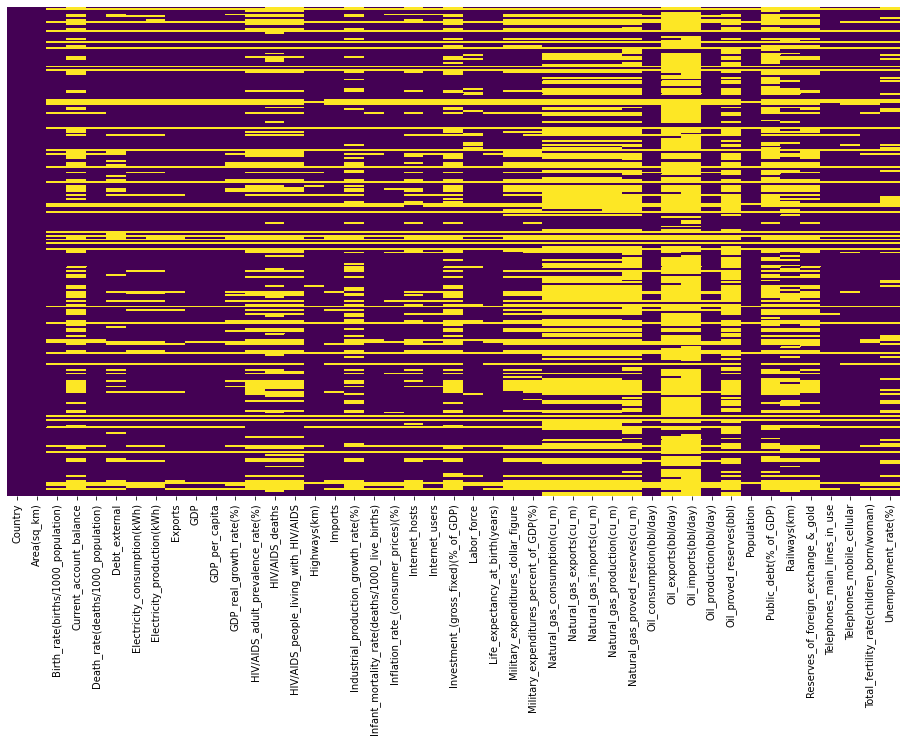

In [7]:
# view dataset's null data, represented by yellow lines
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
#%%sql
#select row_number() over ( order by Country) as RowNum, *from df where Population is null

In [9]:
# drop all rows where population is null
df.dropna(subset=['Population'],inplace=True)

In [10]:
# drop specific columns with no significant data, or missing too much data
df.drop('Natural_gas_consumption(cu_m)',axis=1,inplace=True)
df.drop('Natural_gas_exports(cu_m)',axis=1,inplace=True)
df.drop('Natural_gas_imports(cu_m)',axis=1,inplace=True)
df.drop('Natural_gas_production(cu_m)',axis=1,inplace=True)
df.drop('Natural_gas_proved_reserves(cu_m)',axis=1,inplace=True)
df.drop('Oil_exports(bbl/day)',axis=1,inplace=True)
df.drop('Oil_imports(bbl/day)',axis=1,inplace=True)
df.drop('Oil_proved_reserves(bbl)',axis=1,inplace=True)
df.drop('Public_debt(%_of_GDP)',axis=1,inplace=True)
df.drop('Current_account_balance',axis=1,inplace=True)
df.drop('Investment_(gross_fixed)(%_of_GDP)',axis=1,inplace=True)
df.drop('Railways(km)',axis=1,inplace=True)
df.drop('Reserves_of_foreign_exchange_&_gold',axis=1,inplace=True)
df.drop('Military_expenditures_dollar_figure',axis=1,inplace=True)
df.drop('Military_expenditures_percent_of_GDP(%)',axis=1,inplace=True)
df.drop('Industrial_production_growth_rate(%)',axis=1,inplace=True)
df.drop('HIV/AIDS_adult_prevalence_rate(%)',axis=1,inplace=True)
df.drop('HIV/AIDS_deaths',axis=1,inplace=True)
df.drop('HIV/AIDS_people_living_with_HIV/AIDS',axis=1,inplace=True)

In [11]:
# remaining column names with total null value rows
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
df.head()

,Country,Area(sq_km),Birth_rate(births/1000_population),Death_rate(deaths/1000_population),Debt_external,Electricity_consumption(kWh),Electricity_production(kWh),Exports,GDP,GDP_per_capita,...,Internet_users,Labor_force,Life_expectancy_at_birth(years),Oil_consumption(bbl/day),Oil_production(bbl/day),Population,Telephones_main_lines_in_use,Telephones_mobile_cellular,Total_fertility_rate(children_born/woman),Unemployment_rate(%)
0,Afghanistan,647500,47.02,20.75,8.000000e+09,6.522000e+08,5.400000e+08,4.460000e+08,2.150000e+10,800.0,...,1000.0,11800000.0,42.90,3500.0,0.0,29928987.0,33100.0,15000.0,6.75,NaN
2,Albania,28748,15.08,5.12,1.410000e+09,6.760000e+09,5.680000e+09,5.524000e+08,1.746000e+10,4900.0,...,30000.0,1090000.0,77.24,7500.0,2000.0,3563112.0,255000.0,1100000.0,2.04,14.8
3,Algeria,2381740,17.13,4.60,2.190000e+10,2.361000e+10,2.576000e+10,3.216000e+10,2.123000e+11,6600.0,...,500000.0,9910000.0,73.00,209000.0,1200000.0,32531853.0,2199600.0,1447310.0,1.92,25.4
4,American Samoa,199,23.13,3.33,NaN,1.209000e+08,1.300000e+08,3.000000e+07,5.000000e+08,8000.0,...,NaN,14000.0,75.84,3800.0,0.0,57881.0,15000.0,2377.0,3.25,6.0
5,Andorra,468,9.00,6.07,NaN,NaN,NaN,5.800000e+07,1.900000e+09,26800.0,...,24500.0,33000.0,83.51,NaN,NaN,70549.0,35000.0,23500.0,1.29,0.0


In [12]:
# set remaining null values to the mean of the column
df['Birth_rate(births/1000_population)'].fillna((df['Birth_rate(births/1000_population)'].mean()),inplace=True)
df['Death_rate(deaths/1000_population)'].fillna((df['Death_rate(deaths/1000_population)'].mean()),inplace=True)
df['Debt_external'].fillna((df['Debt_external'].mean()),inplace=True)
df['Electricity_consumption(kWh)'].fillna((df['Electricity_consumption(kWh)'].mean()),inplace=True)
df['Electricity_production(kWh)'].fillna((df['Electricity_production(kWh)'].mean()),inplace=True)
df['Exports'].fillna((df['Exports'].mean()),inplace=True)
df['GDP'].fillna((df['GDP'].mean()),inplace=True)
df['GDP_per_capita'].fillna((df['GDP_per_capita'].mean()),inplace=True)
df['GDP_real_growth_rate(%)'].fillna((df['GDP_real_growth_rate(%)'].mean()),inplace=True)
df['Highways(km)'].fillna((df['Highways(km)'].mean()),inplace=True)
df['Imports'].fillna((df['Imports'].mean()),inplace=True)
df['Infant_mortality_rate(deaths/1000_live_births)'].fillna((df['Infant_mortality_rate(deaths/1000_live_births)'].mean()),inplace=True)
df['Inflation_rate_(consumer_prices)(%)'].fillna((df['Inflation_rate_(consumer_prices)(%)'].mean()),inplace=True)
df['Internet_hosts'].fillna((df['Internet_hosts'].mean()),inplace=True)
df['Internet_users'].fillna((df['Internet_users'].mean()),inplace=True)
df['Labor_force'].fillna((df['Labor_force'].mean()),inplace=True)
df['Life_expectancy_at_birth(years)'].fillna((df['Life_expectancy_at_birth(years)'].mean()),inplace=True)
df['Oil_consumption(bbl/day)'].fillna((df['Oil_consumption(bbl/day)'].mean()),inplace=True)
df['Oil_production(bbl/day)'].fillna((df['Oil_production(bbl/day)'].mean()),inplace=True)
df['Telephones_main_lines_in_use'].fillna((df['Telephones_main_lines_in_use'].mean()),inplace=True)
df['Telephones_mobile_cellular'].fillna((df['Telephones_mobile_cellular'].mean()),inplace=True)
df['Total_fertility_rate(children_born/woman)'].fillna((df['Total_fertility_rate(children_born/woman)'].mean()),inplace=True)
df['Unemployment_rate(%)'].fillna((df['Unemployment_rate(%)'].mean()),inplace=True)

<AxesSubplot:>

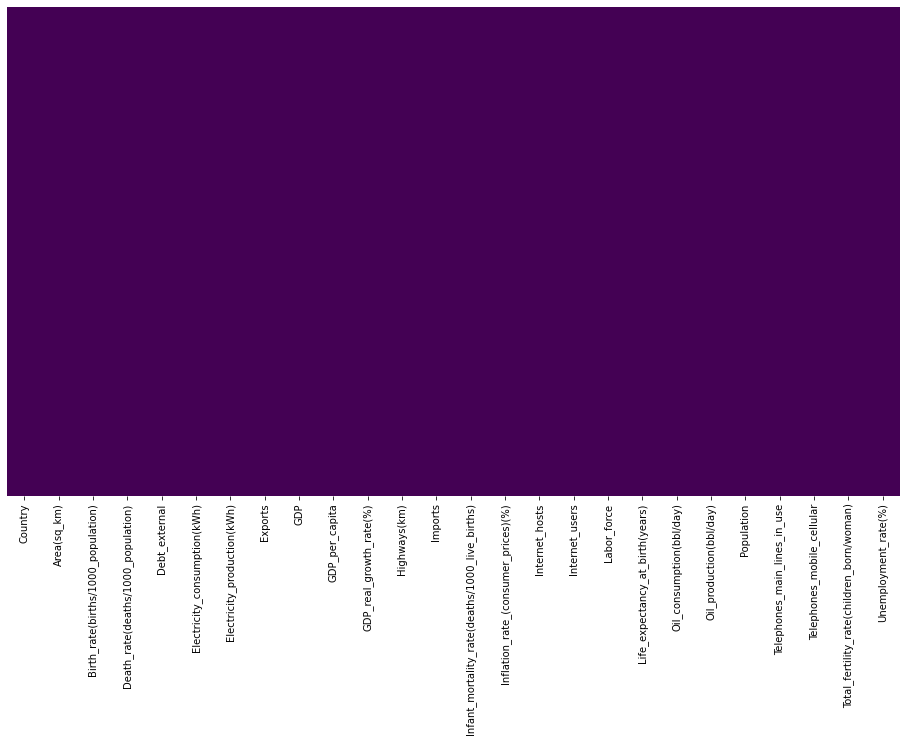

In [13]:
plt.figure(figsize = (16,9)) 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

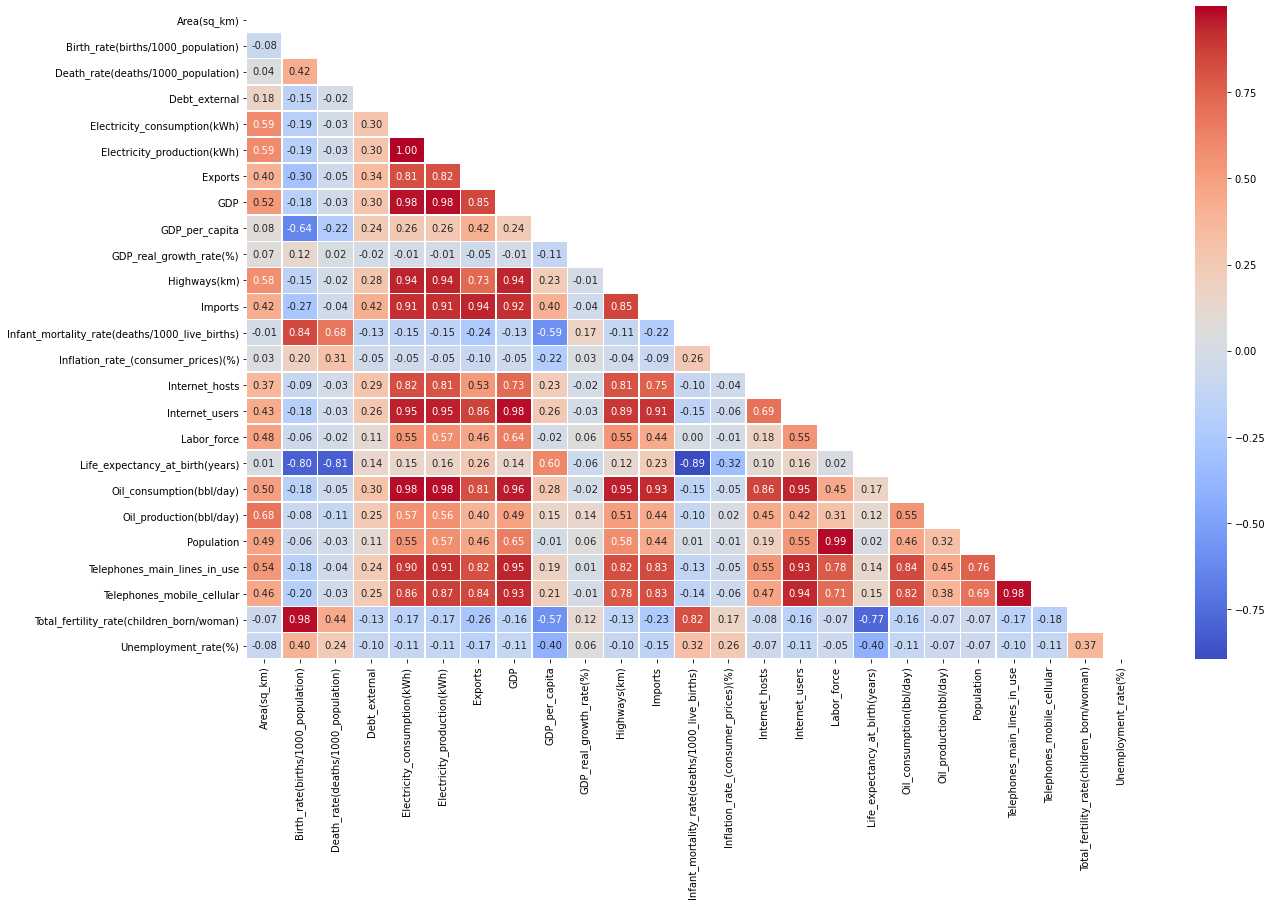

In [14]:
# Pearson correlation matrix
pearsoncorr = df.corr(method='pearson')
plt.figure(figsize = (20,12))
sns.heatmap(pearsoncorr,
mask= np.triu(df.corr()),
xticklabels=pearsoncorr.columns, yticklabels=pearsoncorr.columns, cmap="coolwarm",
fmt=".2f",
annot=True, linewidth=0.5)

In [15]:
# drop columns with no correlation value and/or that could cause multicollinearity
df.drop('Area(sq_km)', axis=1, inplace=True) 
df.drop('Death_rate(deaths/1000_population)', axis=1, inplace=True) 
df.drop('Debt_external', axis=1, inplace=True)
df.drop('GDP_per_capita', axis=1, inplace=True) 
df.drop('GDP_real_growth_rate(%)', axis=1, inplace=True) 
df.drop('Infant_mortality_rate(deaths/1000_live_births)', axis=1, inplace=True) 
df.drop('Inflation_rate_(consumer_prices)(%)', axis=1, inplace=True) 
df.drop('Internet_hosts', axis=1, inplace=True) 
df.drop('Life_expectancy_at_birth(years)', axis=1, inplace=True) 
df.drop('Oil_production(bbl/day)', axis=1, inplace=True) 
df.drop('Unemployment_rate(%)', axis=1, inplace=True)

In [16]:
# potential multicollinearity issue
df.drop('Electricity_production(kWh)', axis=1, inplace=True) 
df.drop('Telephones_main_lines_in_use', axis=1, inplace=True)

<AxesSubplot:>

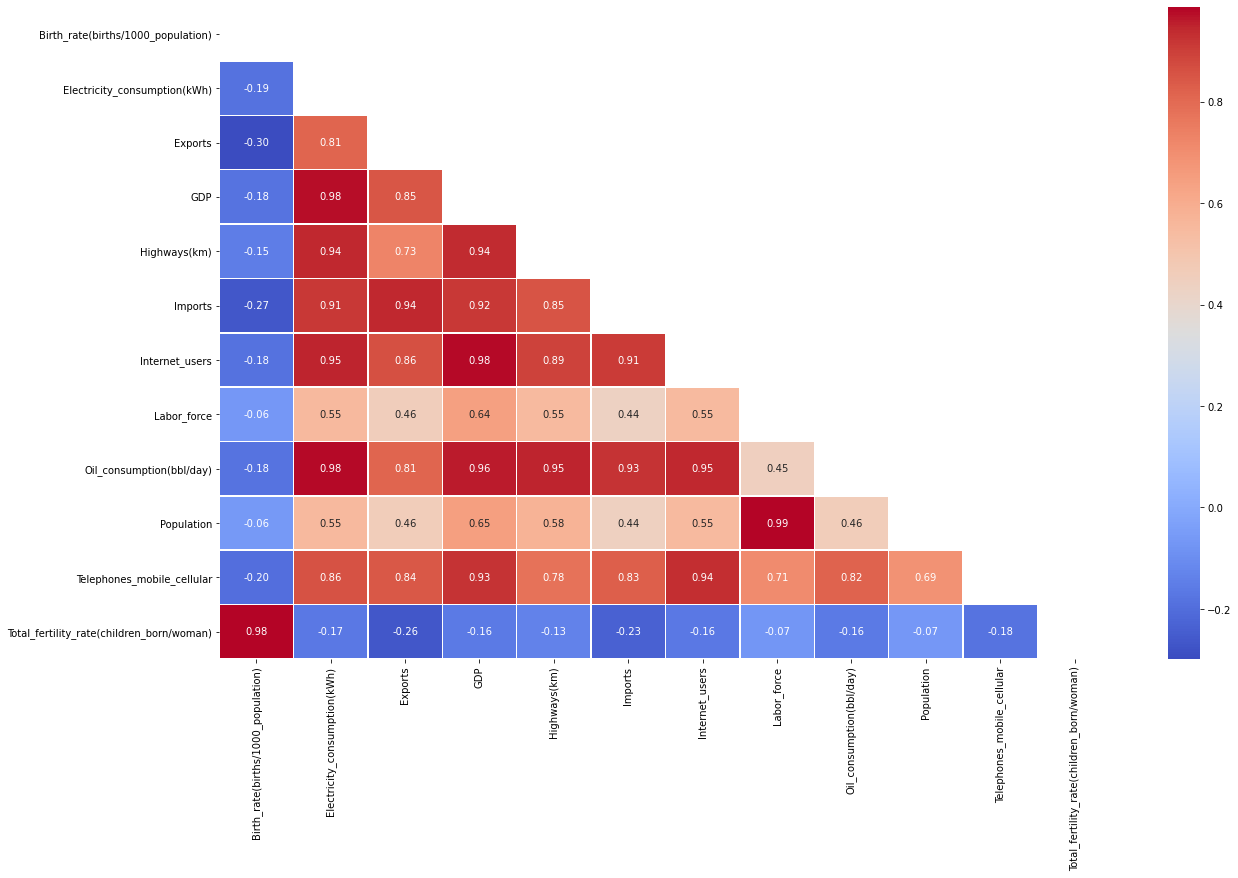

In [17]:
# 2nd Pearson correlation matrix
pearsoncorr2 = df.corr(method='pearson')
plt.figure(figsize = (20,12))
sns.heatmap(pearsoncorr2,
mask= np.triu(df.corr()),
xticklabels=pearsoncorr2.columns, yticklabels=pearsoncorr2.columns, cmap="coolwarm",
fmt=".2f",
annot=True, linewidth=0.5)

<Figure size 1152x648 with 0 Axes>

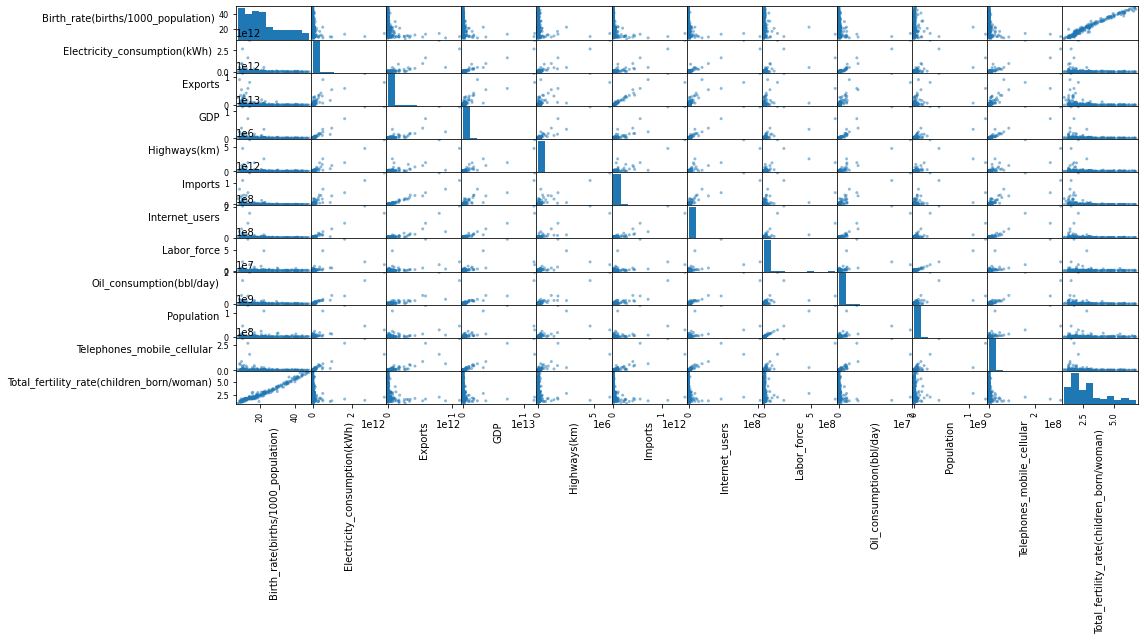

In [18]:
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as inf

#
plt.figure(figsize = (16,9)) 
axes = pd.plotting.scatter_matrix(df, figsize=(16,9))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [19]:
df.drop('Total_fertility_rate(children_born/woman)', axis=1, inplace=True)
df.drop('Population', axis=1, inplace=True)
df.drop('Imports', axis=1, inplace=True)

<Figure size 1152x648 with 0 Axes>

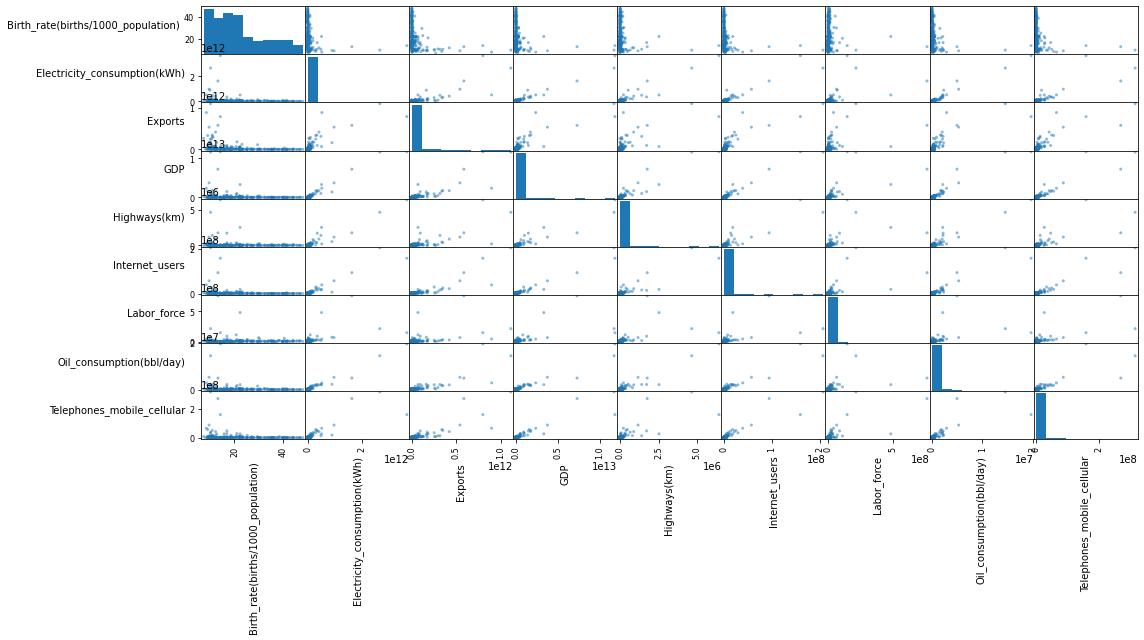

In [20]:
plt.figure(figsize = (16,9)) 
axes = pd.plotting.scatter_matrix(df, figsize=(16,9))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

<AxesSubplot:>

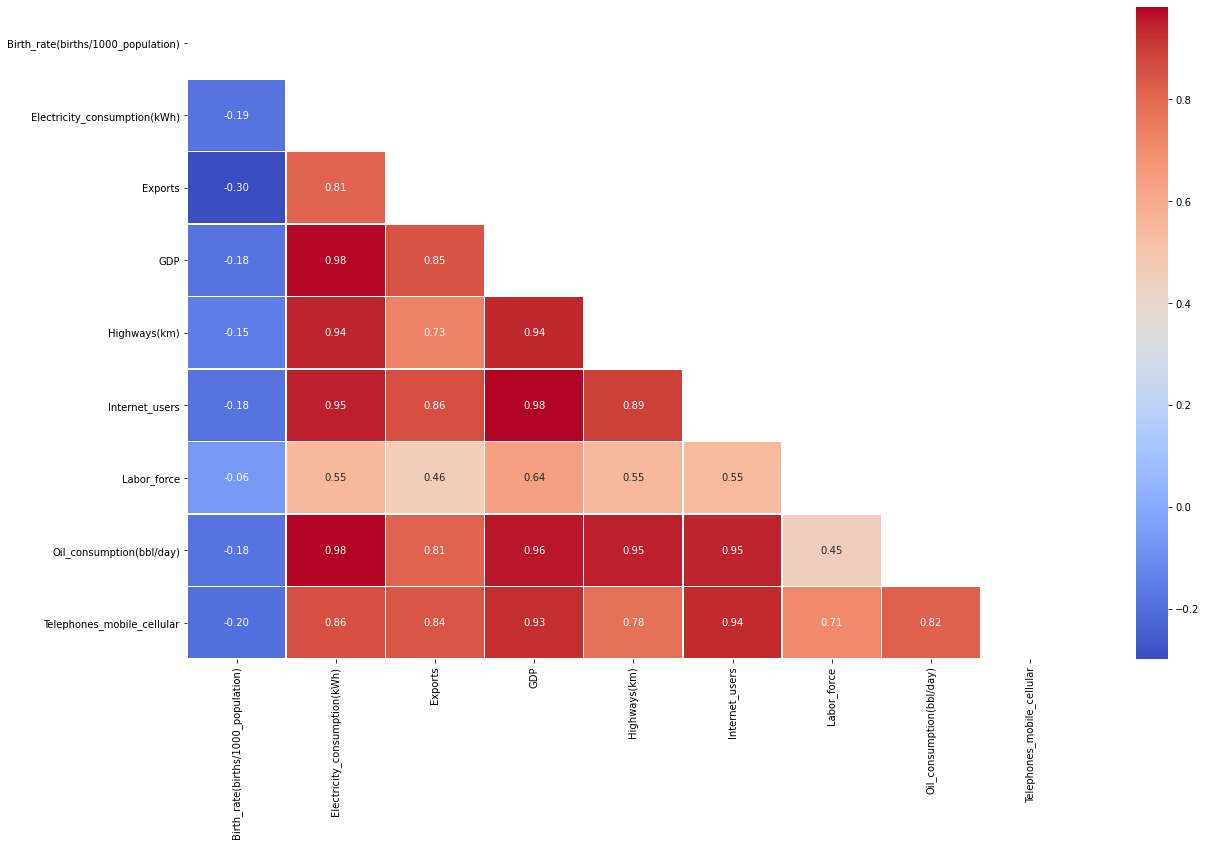

In [21]:
pearsoncorr3 = df.corr(method='pearson')
plt.figure(figsize = (20,12))
sns.heatmap(pearsoncorr3,
mask= np.triu(df.corr()),
xticklabels=pearsoncorr3.columns, yticklabels=pearsoncorr3.columns, cmap="coolwarm",
fmt=".2f",
annot=True, linewidth=0.5)

In [22]:
#Splitting the data, leaving 25% for testing
from sklearn.model_selection import train_test_split
import random

In [23]:
df_train, df_test = train_test_split(df, test_size = 0.25, random_state = 7)

In [24]:
print(" Original = ", len(df), '\n',
"Test Size = ", len(df_test), '\n',
"Train Size = ", len(df_train))

 Original =  238 
 Test Size =  60 
 Train Size =  178


In [25]:
list(df_train)

['Country',
 'Birth_rate(births/1000_population)',
 'Electricity_consumption(kWh)',
 'Exports',
 'GDP',
 'Highways(km)',
 'Internet_users',
 'Labor_force',
 'Oil_consumption(bbl/day)',
 'Telephones_mobile_cellular']

In [32]:
X = pd.DataFrame(df_train[['Birth_rate(births/1000_population)',
                           'Electricity_consumption(kWh)',
                           'Exports',
                           'Highways(km)',
                           'Internet_users',
                           'Labor_force',
                           'Oil_consumption(bbl/day)',
                           'Telephones_mobile_cellular']])
y = pd.DataFrame(df_train[['GDP']])

In [33]:
X = sm.add_constant(X)
X.head()

,const,Birth_rate(births/1000_population),Electricity_consumption(kWh),Exports,Highways(km),Internet_users,Labor_force,Oil_consumption(bbl/day),Telephones_mobile_cellular
17,1.0,17.87,1.596000e+09,6.360000e+08,2693.0,84000.0,1.560000e+05,23000.0,121800.0
33,1.0,16.83,3.519000e+11,9.500000e+10,1724929.0,14300000.0,8.900000e+07,2199000.0,46373300.0
146,1.0,12.00,7.216000e+09,1.629000e+09,8684.0,100000.0,8.550000e+05,22000.0,365300.0
47,1.0,45.98,8.940000e+07,3.650000e+08,33400.0,15000.0,1.471036e+07,1500.0,65000.0
53,1.0,20.82,4.114000e+10,1.550000e+10,112998.0,2732200.0,2.070000e+07,252000.0,6186200.0


In [34]:
model_1 = sm.OLS(y, X).fit()

In [35]:
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                            Results: Ordinary least squares
========================================================================================================================
Model:                                 OLS                               Adj. R-squared:                      0.995     
Dependent Variable:                    GDP                               AIC:                                 9439.4275 
Date:                                  2021-08-05 02:01                  BIC:                                 9468.0635 
No. Observations:                      178                               Log-Likelihood:                      -4710.7   
Df Model:                              8                                 F-statistic:                         4329.     
Df Residuals:                          169                               Prob (F-statistic):                  3.28e-191 
R-squared:                             0.995                             Scale:                               5.9840e+21
------------------------------------------------------------------------------------------------------------------------
                                         Coef.           Std.Err.        t    P>|t|        [0.025            0.975]     
------------------------------------------------------------------------------------------------------------------------
const                              -49170293910.6073 15137352218.1721 -3.2483 0.0014 -79052947696.8559 -19287640124.3588
Birth_rate(births/1000_population)   1334561993.4576   602170074.3273  2.2163 0.0280    145817780.3211   2523306206.5941
Electricity_consumption(kWh)                  0.3809           0.2114  1.8021 0.0733           -0.0363            0.7981
Exports                                       0.3448           0.1303  2.6457 0.0089            0.0875            0.6022
Highways(km)                             203369.8358       45980.3133  4.4230 0.0000       112600.0787       294139.5929
Internet_users                            17170.1394        2627.0329  6.5359 0.0000        11984.1125        22356.1663
Labor_force                                 576.2012         331.3590  1.7389 0.0839          -77.9347         1230.3371
Oil_consumption(bbl/day)                  96493.3385       35677.8362  2.7046 0.0075        26061.7060       166924.9709
Telephones_mobile_cellular                13529.3970        1498.3084  9.0298 0.0000        10571.5858        16487.2083
------------------------------------------------------------------------------------------------------------------------
Omnibus:                               49.258                       Durbin-Watson:                          2.164       
Prob(Omnibus):                         0.000                        Jarque-Bera (JB):                       454.002     
Skew:                                  -0.666                       Prob(JB):                               0.000       
Kurtosis:                              10.710                       Condition No.:                          742037871474
========================================================================================================================
* The condition number is large (7e+11). This might indicate             strong multicollinearity or other numerical
problems.
"""

In [45]:
X2 = pd.DataFrame(df_train[['Highways(km)',
                           'Internet_users',
                           'Oil_consumption(bbl/day)',
                           'Telephones_mobile_cellular']])

In [46]:
X2 = sm.add_constant(X2)

In [47]:
model_2 = sm.OLS(y, X2).fit()

In [48]:
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                      Results: Ordinary least squares
============================================================================================================
Model:                             OLS                           Adj. R-squared:                  0.994     
Dependent Variable:                GDP                           AIC:                             9451.2238 
Date:                              2021-08-05 02:07              BIC:                             9467.1328 
No. Observations:                  178                           Log-Likelihood:                  -4720.6   
Df Model:                          4                             F-statistic:                     7926.     
Df Residuals:                      173                           Prob (F-statistic):              9.54e-195 
R-squared:                         0.995                         Scale:                           6.5333e+21
------------------------------------------------------------------------------------------------------------
                                 Coef.           Std.Err.       t    P>|t|        [0.025          0.975]    
------------------------------------------------------------------------------------------------------------
const                      -12354676094.6805 6644084929.6895 -1.8595 0.0647 -25468580488.7164 759228299.3554
Highways(km)                     220771.9588      45887.5118  4.8112 0.0000       130200.5032    311343.4143
Internet_users                    14732.7385       2348.7209  6.2727 0.0000        10096.9006     19368.5765
Oil_consumption(bbl/day)         141202.9873      27979.4444  5.0467 0.0000        85977.9620    196428.0125
Telephones_mobile_cellular        17775.3663        683.8909 25.9915 0.0000        16425.5220     19125.2107
------------------------------------------------------------------------------------------------------------
Omnibus:                           36.809                     Durbin-Watson:                        2.204   
Prob(Omnibus):                     0.000                      Jarque-Bera (JB):                     425.640 
Skew:                              -0.027                     Prob(JB):                             0.000   
Kurtosis:                          10.575                     Condition No.:                        41038836
============================================================================================================
* The condition number is large (4e+07). This might indicate             strong multicollinearity or other
numerical problems.
"""

In [43]:
#Running test data through models
X_test = pd.DataFrame(df_test[['Highways(km)',
                           'Internet_users',
                           'Oil_consumption(bbl/day)',
                           'Telephones_mobile_cellular']])
y_test = pd.DataFrame(df_test[['GDP']])

In [44]:
X_test = sm.add_constant(X_test)

In [50]:
model_3_test = sm.OLS(y_test, X_test).fit()
model_3_test.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                        Results: Ordinary least squares
===============================================================================================================
Model:                              OLS                            Adj. R-squared:                   0.992     
Dependent Variable:                 GDP                            AIC:                              3254.5485 
Date:                               2021-08-05 02:15               BIC:                              3265.0202 
No. Observations:                   60                             Log-Likelihood:                   -1622.3   
Df Model:                           4                              F-statistic:                      1907.     
Df Residuals:                       55                             Prob (F-statistic):               2.90e-58  
R-squared:                          0.993                          Scale:                            1.9505e+22
---------------------------------------------------------------------------------------------------------------
                                 Coef.           Std.Err.        t    P>|t|        [0.025           0.975]     
---------------------------------------------------------------------------------------------------------------
const                      -24679007168.7042 19646063591.2254 -1.2562 0.2144 -64050598391.8106 14692584054.4021
Highways(km)                     824787.5890       66087.0220 12.4803 0.0000       692346.2373      957228.9406
Internet_users                    10929.9778        7113.0340  1.5366 0.1301        -3324.8610       25184.8165
Oil_consumption(bbl/day)         114784.8917       53665.3984  2.1389 0.0369         7237.0301      222332.7532
Telephones_mobile_cellular        16356.2837        3259.0887  5.0187 0.0000         9824.9239       22887.6434
---------------------------------------------------------------------------------------------------------------
Omnibus:                            17.280                      Durbin-Watson:                         1.782   
Prob(Omnibus):                      0.000                       Jarque-Bera (JB):                      77.480  
Skew:                               -0.395                      Prob(JB):                              0.000   
Kurtosis:                           8.511                       Condition No.:                         34539584
===============================================================================================================
* The condition number is large (3e+07). This might indicate             strong multicollinearity or other
numerical problems.
"""